<a href="https://colab.research.google.com/github/akangelov/Data-Science-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd

# Are Real Estate Investment Trust (REITs) a better investment vehicle than stocks?


# Article Content

<ul>
<li>I.Introduction</li>
<li>II.Data and methods</li>
<li>III.Dataset</li>
<li>IV.Hypothesis</li>
<li>V.Previous Research</li>
<li>VI.Results</li>
<li>VII.Testing (with yearly data)</li>
<li>VIII.Conclusions</li>
<li>IX.Further Research</li>
<li>X.References</li>
</ul>

# I.Introduction

In my project I want to give reply to the following question: <u>*Are REITs a better investment vehicle than stocks?*</u> Before I start my research I would like to provide a short definition of these two investment vehicles.

**Stocks** - A common stock is a security that represents ownership in a corporation. E.g. Microsoft, Tesla, Facebook etc.

**REIT** - A real estate investment trust (REIT) is a company that owns, operates, or finances income-generating real estate. Modeled after mutual funds, REITs pool the capital of numerous investors. This makes it possible for individual investors to earn dividends from real estate investments—without having to buy, manage, or finance any properties themselves.


# II.Data and Methods

I will gather the **monthly and the yearly returns** for the last 48 years (1972-2020) of the stock and the REIT markets. 

The assumtion that I make is that the returns are **normally** distributed. Normal distribution of stock/asset returns is a standard assumption in finance used in many models. It provides analysts with proxies for the average returns (mean) and risk (standard deviation) of an asset.  

I will plot histograms of stocks/REITS distribution returns.
I will investigate their **return, risk and correlation** proxied by the **mean**, **standard deviation** and **correlation** of the distributions.
I will compare them in terms of risk and return and draw conclusions.

As a proxy for the Stock market returns I will use the **S&P 500 index**. The S&P 500 index is a market-capitalization-weighted index of the 500 largest publicly-traded companies in the U.S.

As a proxy for the REITs return I will use the **FTSE NAREIT All Equity REIT Index**. This index contains all 12 equity REIT subsectors. (1972-start of index).


# III.Dataset

Below I present the **sources** and the <b>structure</b> of my datasets.

My dataset contains the <b>monthly and yearly returns</b> and dividend yields of the S&P 500 index and the FTSE NAREIT All Equity REIT index for the period <b> Jan-1972 - March-2021 </b>. From these I construct the price and total return indexes of the two. 


### Sources

There are two sources that are mainly used. For the REIT Returns I use the historical data provided by NAREIT and for the equity returns I use Yahoo Finance

1. NAREIT - The National Association of Real Estate Investment Trusts – more commonly known as NAREIT – acts as the voice for equity and mortgage REITs, REITs traded on all major stock exchanges.

<a>https://www.reit.com/data-research/reit-indexes/ftse-nareit-us-real-estate-index-historical-values-returns </a>

2. Yahoo Finance

<a>https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC </a>

### Definitions

1. <b>Price index</b> - is a measure of relative price changes, consisting of a series of numbers arranged so that a comparison between the values for any two periods or places will show the average change in prices between periods 


2. <b>Total return index</b> - is a type of index that tracks both the capital gains as well as any cash distributions, such as dividends or interest, attributed to the components of the index. 

### Structure

My dataset contains 9 columns. 

1. Column 1 - **Date**
2. Columns 2 & 3 - S&P 500 and All Reits indexes monthly **returns** (percentages)
3. Columns 4 & 5 - S&P 500 and All Reits indexes monthly **dividend yields** (percentages)
4. Columns 6 & 7 - S&P 500 and All Reits indexes **total returns** (dividend + price returns)
5. Columns 8 & 9 - S&P 500 and All reits <b>price</b> indices calculated using the data in columns 2 & 3
6. Columns 10 & 11 - S&P 500 and All reits <b>total return</b> indices calculated using the data in columns 2 & 3 & 4 & 5

### Data manipulation

Columns 1 through 5 is the raw data taken from the sources.

Columns 8 & 9 - To construct the <b>price indexes</b> I use a baseline value of 100 and I multiply the index value by each months return + 1

 $ Previous\, price\, index\, value * (Monthly\, Return + 1) $
 
Columns 10 & 11 - For the construction of the <b>total return</b> indexes I use again a baseline of 100. 

$ (Previous\, price\, index\, value * (Monthly\, Return + 1)) + (Previous\, price\, index\, value * Current\, month\, dividend yield) $ 

In other words, the total return consists of: 1. The price change of the index from one month to another + the dividend yield resulting from the previous month index closing price dollar value invested at the current month dividend yield


# IV.Hypothesis

The hypothesis that I make and investigate is that **REITs** are a **better investment** than stocks having a <u>higher</u> **average return (mean)** and <u>lower</u> **risk (standard deviation)** as represented by the chosen proxies. I will additionally investigate REITs **correlation (Pearson coefficient)** with stocks to answer the question whether they are a good addition to a stock protfolio in terms of diversification. An asset is a good difersifier if it has a <u>low to moderate</u> correlation with another asset.


# V.Previous research

The results of the previous research that I investigated and read are the following:

1. There is a consensus that over the long run REITS historical total returns (mean) are higher than stocks
2. REITS risk (standard deviation) is lower than stocks
3. REITS and stocks have a slight positive correlation (pearson coefficient)

Below I cite the sources of my research:

<ul>
<li>Return (Mean)<br>
<a>https://www.reit.com/news/blog/market-commentary/reit-average--historical-returns-vs-us-stocks-sp-500 </a><br>
<a>https://www.millionacres.com/research/reits-vs-stocks/ </a></li><br>
                                                                      
    
<li>Risk(SD)<br>
    <a>https://seekingalpha.com/article/4061110-reits-vs-stocks-risk-comparison</a></li><br>
<li>    
Correaltion(Pearson Coefficient)<br>
<a>https://fourpillarfreedom.com/are-reits-and-stocks-correlated/</a></li>
</ul>

It is to be seen whether the above results will be confirmed with my dataset

# VI.Results


## Steps

1. Reading the dataset
2. Plotting the histograms and providing comments on the distributions
3. Defining functions to calculate the mean, standard variation and correlation of the Stock/REIT returns
4. Calculations and comments on the results
5. Calculation of the 95% confidence intervals and 
6. Plotting the price and total return indexes and providing comments


### 1.Reading the dataset

In [ ]:
returns_data = pd.read_excel("Dataset.xlsx")
returns_data

,Date,S&P 500 Monthly Price Returns,All Reits Monthly Price Returns,S&P Monthly Dividend Yield,All Reits Monthly Dividend Yield,S&P Monthly Total Returns (Price + Dividends),All Reits Monthly Total Returns (Price + Dividends),S&P Price Index (Baseline =100),All Reits Price Index (Baseline =100),S&P Total Return Index (Baseline=100),All Reits Total Return Index (Baseline=100)
0,1972-01-31,0.041646,-0.013454,0.002475,0.005108,0.044121,-0.008345,104.164566,98.654620,104.412066,99.165453
1,1972-02-29,0.018393,0.017370,0.002433,0.004783,0.020826,0.022153,106.080468,100.368260,106.586590,101.362308
2,1972-03-31,0.023764,-0.007365,0.002375,0.004933,0.026139,-0.002432,108.601392,99.629057,109.372684,101.115838
3,1972-04-30,0.010214,0.032363,0.002350,0.004767,0.012564,0.037130,109.710598,102.853352,110.746794,104.870235
4,1972-05-31,-0.010110,-0.097454,0.002375,0.005442,-0.007735,-0.092012,108.601392,92.829865,109.890135,95.220864
...,...,...,...,...,...,...,...,...,...,...,...
586,2020-11-30,0.038111,0.091085,0.001375,0.003042,0.039486,0.094126,3578.695674,700.803065,14247.700380,16943.033360
587,2020-12-31,0.041228,0.018596,0.001317,0.002967,0.042545,0.021563,3726.237774,713.835315,14853.862587,17308.373133
588,2021-01-29,0.026639,-0.001666,0.001275,0.002958,0.027914,0.001292,3825.500072,712.645856,15268.489520,17330.736248
589,2021-02-26,0.023640,0.025933,0.001242,0.002883,0.024882,0.028816,3915.934360,731.126917,15648.392860,17830.144908


### 2.Histograms Plots

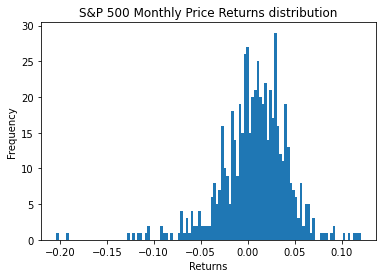

In [ ]:
plt.hist(returns_data["S&P 500 Monthly Price Returns"], bins = 120)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("S&P 500 Monthly Price Returns distribution")
plt.show()

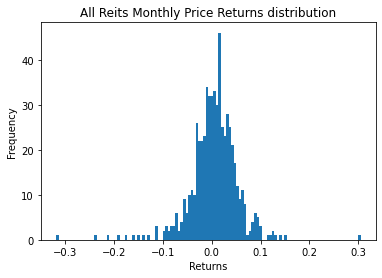

In [ ]:
plt.hist(returns_data["All Reits Monthly Price Returns"], bins = 120)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("All Reits Monthly Price Returns distribution")
plt.show()

**Comment**: By plotting the Stock/REIT returns I see that they are <u>approximately</u> **normally distributed** as was my initial assumption.  

### 3.Defining Functions

I define functions in Python to calculate the mean, standard deviation and the Standard deviation of the returns

In [ ]:
def calculate_mean(returns):    
    return "Mean " + returns.name + ": " + str(round((returns.mean()) * 100, 2)) + "%"

def calculate_std(returns):    
    return "Standard deviation " + returns.name + ": " + str(round((returns.std()) * 100, 2)) + "%"

def calculate_corr(returns_asset1, returns_asset2 ):    
    return "Correlation between " + returns_asset1.name +" and " + returns_asset2.name +" is " + str(round((returns_asset1.corr(returns_asset2)), 2))


### 4.Calculating Risk, Return and Correlation

   #### 4.1 Mean calculation

In [ ]:
print(calculate_mean(returns_data["S&P 500 Monthly Price Returns"]))
print(calculate_mean(returns_data["All Reits Monthly Price Returns"]))
print(calculate_mean(returns_data["S&P Monthly Total Returns (Price + Dividends)"]))
print(calculate_mean(returns_data["All Reits Monthly Total Returns (Price + Dividends)"]))

Mean S&P 500 Monthly Price Returns: 0.69%
Mean All Reits Monthly Price Returns: 0.47%
Mean S&P Monthly Total Returns (Price + Dividends): 0.93%
Mean All Reits Monthly Total Returns (Price + Dividends): 1.01%


**Comment**:I observe that the **price** returns of <u>Stocks</u> are higher than the preice returns of <u>REITS</u>.
However, and more importantly, if we factor in the dividends, the **total** average returns of <u>REITS</u> is **higher** than that of <u>Stocks</u> - 1.01% vs 0.93%.

#### 4.2 Standard Deviation Calculation

In [ ]:
print(calculate_std(returns_data["S&P 500 Monthly Price Returns"]))
print(calculate_std(returns_data["All Reits Monthly Price Returns"]))
print(calculate_std(returns_data["S&P Monthly Total Returns (Price + Dividends)"]))
print(calculate_std(returns_data["All Reits Monthly Total Returns (Price + Dividends)"]))

Standard deviation S&P 500 Monthly Price Returns: 3.64%
Standard deviation All Reits Monthly Price Returns: 4.86%
Standard deviation S&P Monthly Total Returns (Price + Dividends): 3.64%
Standard deviation All Reits Monthly Total Returns (Price + Dividends): 4.84%


**Comment**: I observe that the Standard Deviation of <u>REITS</u> is **higher** than that of <u>Stocks</u> - 4.86% vs 3.64%.

#### 4.3 Correlation Calculation

In [ ]:
print(calculate_corr(returns_data["S&P 500 Monthly Price Returns"], returns_data["All Reits Monthly Price Returns"]))


Correlation between S&P 500 Monthly Price Returns and All Reits Monthly Price Returns is 0.49


**Comment**: I observe that <u>REITS</u> and <u>Stocks</u> have a <u>slight positive</u> correlation.

### 5.Confidence Intervals

Having calculated the standard deviation and the mean of the Stock and REITs returns,and assuming Normal distribution, I can now determine the 95% confidence interval for their returns.

In [ ]:
mean_total_returns_stocks = round(returns_data["S&P Monthly Total Returns (Price + Dividends)"].mean()*100, 2)
mean_total_returns_reits = round(returns_data["All Reits Monthly Total Returns (Price + Dividends)"].mean()*100, 2)
sd_stocks = round(returns_data["S&P Monthly Total Returns (Price + Dividends)"].std()*100, 2)
sd_reits = round(returns_data["All Reits Monthly Total Returns (Price + Dividends)"].std()*100, 2)
confidence_interval_left_border_stocks_95 =  round(mean_total_returns_stocks - 2 * sd_stocks, 2)
confidence_interval_right_border_stocks_95 =  mean_total_returns_stocks + 2 * sd_stocks
confidence_interval_left_border_reits_95 =  mean_total_returns_reits - 2 * sd_reits
confidence_interval_right_border_reits_95 =  mean_total_returns_reits + 2 * sd_reits

print("Lower bound monthly stock returns:" + str(confidence_interval_left_border_stocks_95) + "%")
print("Upper bound monthly stock returns:"+ str(confidence_interval_right_border_stocks_95) + "%")
print("Lower bound monthly REIT returns:" + str(confidence_interval_left_border_reits_95) + "%")
print("Upper bound monthly REIT returns:" + str(confidence_interval_right_border_reits_95) + "%")

Lower bound monthly stock returns:-6.35%
Upper bound monthly stock returns:8.21%
Lower bound monthly REIT returns:-8.67%
Upper bound monthly REIT returns:10.69%


**Comment**:REITs have higher upper and lower band within the 95% confidence interval. In finance terms they are riskier than stocks.

### 6.Plotting the indices

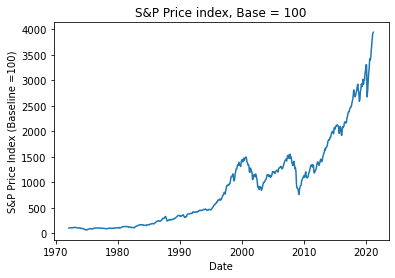

In [ ]:
plt.plot(returns_data["Date"], returns_data["S&P Price Index (Baseline =100)"])
plt.xlabel("Date")
plt.ylabel("S&P Price Index (Baseline =100)")
plt.title("S&P Price index, Base = 100")
plt.show()

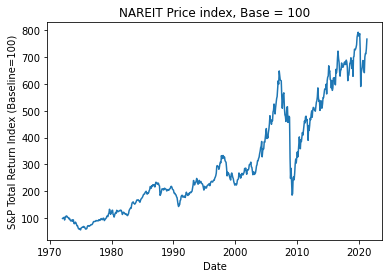

In [ ]:
plt.plot(returns_data["Date"], returns_data["All Reits Price Index (Baseline =100)"])
plt.xlabel("Date")
plt.ylabel("S&P Total Return Index (Baseline=100)")
plt.title("NAREIT Price index, Base = 100")
plt.show()

**Comment**: Observing only the price appreciation of the indexes, 100 USD invested in stocks in 1972 will return around 4000 today, whereas the same 100 USD invested in REITs will return around 800.

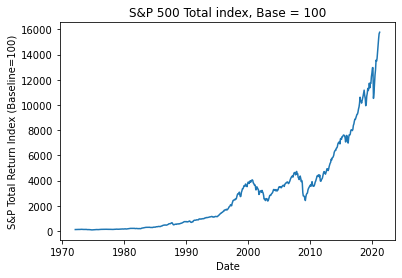

In [ ]:
plt.plot(returns_data["Date"], returns_data["S&P Total Return Index (Baseline=100)"])
plt.xlabel("Date")
plt.ylabel("S&P Total Return Index (Baseline=100)")
plt.title("S&P 500 Total index, Base = 100")
plt.show()

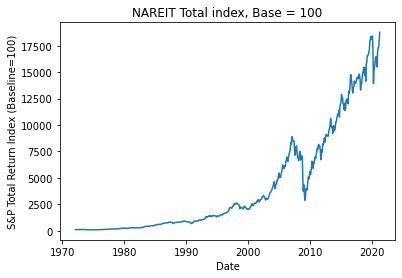

In [ ]:
plt.plot(returns_data["Date"], returns_data["All Reits Total Return Index (Baseline=100)"])
plt.xlabel("Date")
plt.ylabel("S&P Total Return Index (Baseline=100)")
plt.title("NAREIT Total index, Base = 100")
plt.show()

**Comment**: If we factor in the dividends however, 100 USD in <u>REITs</u> provides a **higher** total return than the same amount invested in stocks - 17,500 USD vs 16,000 USD.

# VII.Testing with yearly data

In [ ]:
returns_data_annual = pd.read_excel("Dataset - Annual.xlsx")
returns_data_annual

,Year,S&P Monthly Total Returns (Price + Dividends),REITS Total Returns (Price + Dividends)
0,2020,18.40,-5.121561
1,2019,31.49,28.660000
2,2018,-4.38,-4.044548
3,2017,21.83,8.673904
4,2016,11.96,8.629229
5,2015,1.38,2.825235
6,2014,13.69,28.027586
7,2013,32.39,2.855735
8,2012,16.00,19.700810
9,2011,2.11,8.283718


In [ ]:
print("Yearly total Stock returns: " + str(round(returns_data_annual["S&P Monthly Total Returns (Price + Dividends)"].mean(), 2)) + "%")
print("Yearly total REITS returns: " + str(round(returns_data_annual["REITS Total Returns (Price + Dividends)"].mean(), 2)) + "%")
print("Yearly Stocks SD: " + str(round(returns_data_annual["S&P Monthly Total Returns (Price + Dividends)"].std(), 2)) + "%")
print("Yearly REITs SD: " + str(round(returns_data_annual["REITS Total Returns (Price + Dividends)"].std(), 2)) + "%")
print("Stocks/REIT Correlation :" +str(round(returns_data_annual["REITS Total Returns (Price + Dividends)"].corr(returns_data_annual["S&P Monthly Total Returns (Price + Dividends)"]),2)))

Yearly total Stock returns: 12.26%
Yearly total REITS returns: 12.95%
Yearly Stocks SD: 17.19%
Yearly REITs SD: 17.71%
Stocks/REIT Correlation :0.54


**Comment**: Testing with yearly returns, I observe that I get similar results as when I did the same with monthly returns. Namely, REITs average annual total returns and standard deviation are **higher** than these of stocks. The correlation of the two asset classes is slightly positive.

# VIII.Conclusions

Through my research in Part VI of this article I **partially** confirmed my hypothesis. <br><br>
1.<u>Indeed</u> REITs have a higher both monthly and annual average return than Stocks. <br>
2.REITs <u>also</u> are a good diversifier to a stock portofolio because they have a moderate correlation with stocks.<br>
3.<u>However</u> REITs are <u>riskier</u> than stocks in terms of standard deviation. That contradicts my initial hypothesis.

 


# IX.Further research

Points for **further research** on the topic might be:

<ul>
<li>My conclusion above that REITs have a higher standard deviation of returns compared to stocks contradicts some of the articles that I have read writing the current article. It is interesting to dig deeper why this discrepancy occurs.</li><br>
<li>I have used general indexes as proxies for the REIT and Stock returns. Nevertheless both Stocks and REITs have a wide number of subindexes which vary in risk/return as defined above. E.g. REITS - industrial, commercial, storage, data centers etc. E.g. Stocks - utilities, tech, financials etc. It would be interesting to run the same research on subsector level.</li>

</ul>

# X.References

<a>https://www.reit.com/data-research/reit-indexes/ftse-nareit-us-real-estate-index-historical-values-returns </a><br>
<a>https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC </a><br>
<a>https://www.reit.com/news/blog/market-commentary/reit-average--historical-returns-vs-us-stocks-sp-500 </a><br>
<a>https://www.millionacres.com/research/reits-vs-stocks/ </a><br>
<a>https://seekingalpha.com/article/4061110-reits-vs-stocks-risk-comparison</a><br>
<a>https://fourpillarfreedom.com/are-reits-and-stocks-correlated/</a>